# Module 6: Calculating the magnetic scattering from the mPDF

Here, we show how to generate the magnetic scattering pattern from a corresponding mPDF pattern. We will use MnTe as an example case. This functionality is intended primarily as a tool for qualitative analysis of diffuse magnetic scattering patterns to complement real-space mPDF analysis. If you are interested in performing a genuine magnetic structure solution by refining a model against magnetic Bragg peaks, then you will be better served by programs such as FullProf or GSAS. If you are interested in fitting a magnetic model or magnetic interactions to diffuse magnetic scattering in reciprocal space, then Spinvert and Spinteract by Joe Paddison are good options.

In [2]:
### Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from diffpy.mpdf import *

### Set all plots to be inline
%matplotlib notebook

### Case 1: Long-range magnetic order

To calculate a magnetic scattering pattern with minimal artifacts from Fourier ripples, you first need to calculate the mPDF far enough in r such that the mPDF has been damped to zero. In the case of long-range magnetic order, real-space damping comes from the finite Q-space resolution, captured by the parameter qdamp. We'll use a realistic value of qdamp for typical total scattering instruments (0.025 in this case), meaning we need to calculate the mPDF out to about 200 A.

In [3]:
### Set up the magnetic structure

rmax = 200

# create the MagStructure object by reading in the MCIF
mcif = 'files/0.800_MnTe.mcif'
mstr = create_from_mcif(mcif, ffparamkey='Mn2', rmaxAtoms=rmax)

# populate the MagStructure
mstr.makeAll()

MagStructure creation from mcif file successful.


In [4]:
### Set up the mPDF calculator
mc = MPDFcalculator(mstr)
mc.rmin = 0.05
mc.rmax = rmax
mc.qdamp = 0.025  # typical value of qdamp at neutron total scattering diffractometers
mc.ordScale = 1
mc.paraScale = 20
# Note: the ratio of paraScale to ordScale affects the baseline of the calculated diffraction
# pattern, so if the baseline looks a little weird (e.g. very negative or very positive),
# you can play around with the paraScale value. If the baseline is too positive, then decrease
# paraScale. If it is too negative, then increase it.

<IPython.core.display.Javascript object>


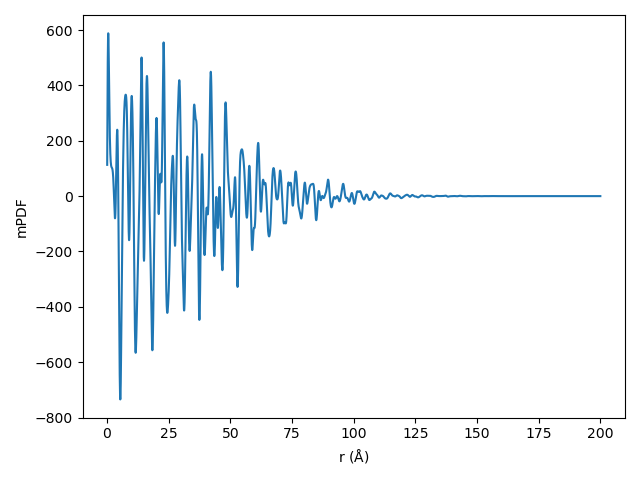

In [5]:
### Calculate the mPDF
r, f, d = mc.calc(both=True)

# plot to make sure we have a sufficiently long range in which the mPDF damps to zero.
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'r ($\mathdefault{\AA}$)')
ax.set_ylabel(r'mPDF')

ax.plot(r,d)

plt.tight_layout()
plt.show()

Now we are ready to generate the magnetic scattering pattern. There are two quantities we can generate: (1) the usual magnetic scattering intensity I(Q) that would be measured at the beamline; and (2) the magnetic structure function S(Q) which has been normalized by the squared magnetic form factor. In the first case, we input the unnormalized mPDF; in the second case, the normalized mPDF.

<IPython.core.display.Javascript object>


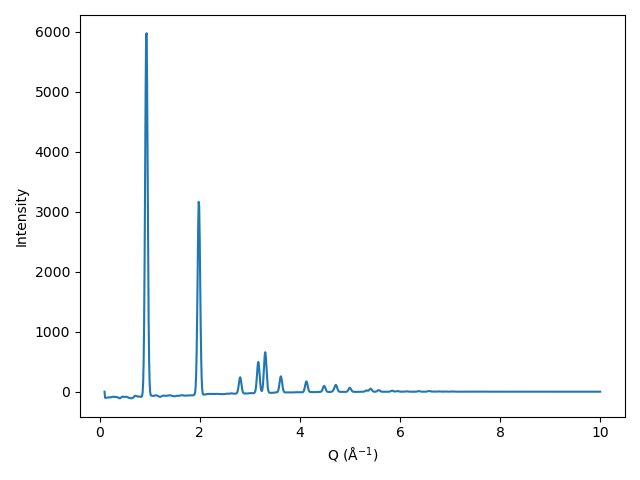

In [6]:
### Calculate the magnetic scattering intensity I(Q)
q, iq = calculateMagScatt(r, d, qmin=0.1, qmax=10, qstep=0.01, quantity='iq')

# plot the result
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Q ($\mathdefault{\AA^{-1}}$)')
ax.set_ylabel('Intensity')

ax.plot(q, iq)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


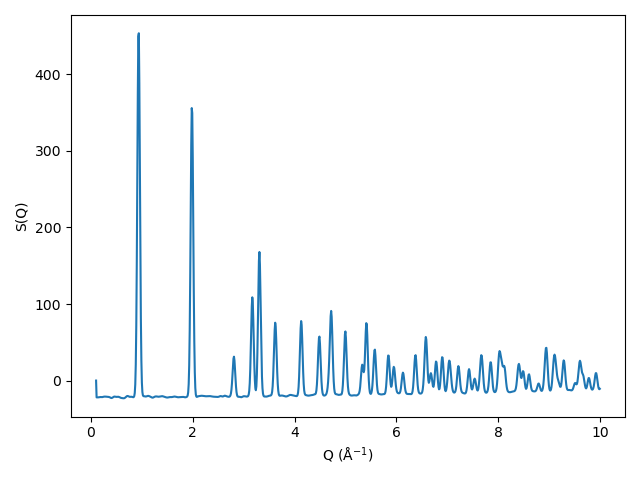

In [7]:
### Now calculate the magnetic structure function S(Q).

# Note that we input the normalized mPDF f as the second argument and 'sq' for 'quantity'
q, sq = calculateMagScatt(r, f, qmin=0.1, qmax=10, qstep=0.01, quantity='sq')

# plot the result
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Q ($\mathdefault{\AA^{-1}}$)')
ax.set_ylabel('S(Q)')

ax.plot(q, sq)

plt.tight_layout()
plt.show()

In [8]:
plt.close('all')

### Case 2: Short-range magnetic order with an isotropic correlation length

Now we'll apply a finite correlation length, so the sharp magnetic Bragg peaks should become broad and diffuse. Due to the shorter correlation length, we can calculate the mPDF out to a shorter distance.

In [9]:
### Set up the magnetic structure

rmax = 75

# create the MagStructure object by reading in the MCIF
mcif = 'files/0.800_MnTe.mcif'
mstr = create_from_mcif(mcif, ffparamkey='Mn2', rmaxAtoms=rmax)
mstr.corrLength = 15

# populate the MagStructure
mstr.makeAll()

MagStructure creation from mcif file successful.


In [10]:
### Set up the mPDF calculator
mc = MPDFcalculator(mstr)
mc.rmin = 0.05
mc.rmax = rmax
mc.qdamp = 0.025  # typical value of qdamp at neutron total scattering diffractometers
mc.ordScale = 1
mc.paraScale = 20

<IPython.core.display.Javascript object>


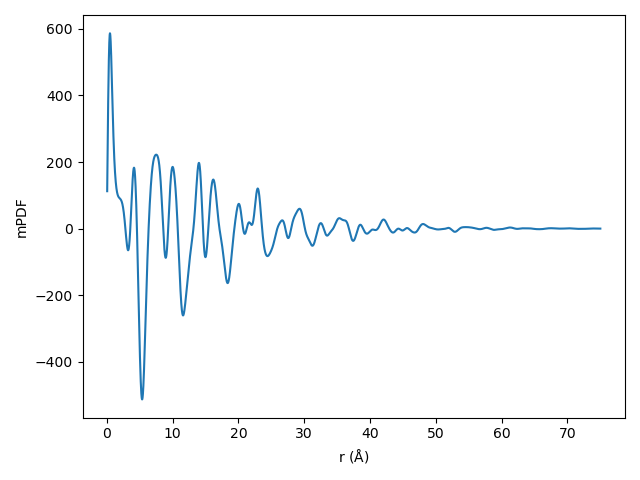

In [11]:
### Calculate the mPDF
r, f, d = mc.calc(both=True)

# plot to make sure we have a sufficiently long range in which the mPDF damps to zero.
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'r ($\mathdefault{\AA}$)')
ax.set_ylabel(r'mPDF')

ax.plot(r,d)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


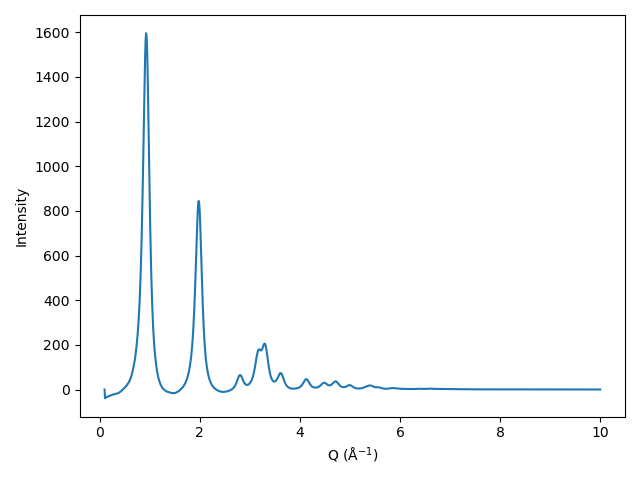

In [12]:
### Calculate the magnetic scattering intensity I(Q)
q, iq = calculateMagScatt(r, d, qmin=0.1, qmax=10, qstep=0.01, quantity='iq')

# plot the result
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Q ($\mathdefault{\AA^{-1}}$)')
ax.set_ylabel('Intensity')

ax.plot(q, iq)

plt.tight_layout()
plt.show()

How are the peaks different from the previous case of long-range magnetic order?

In [13]:
plt.close('all')

### Case 3: Short-range magnetic order with strongly one-dimensional correlation length

Just for fun, let's apply a strongly anisotropic correlation length that results in quasi-1D correlations along the c axis. We will see the characteristic asymmetry in the intensity peaks in the scattering pattern. For more examples involving an anisotropic correlation length, see 05_3DmPDF.ipynb.

In [14]:
### Set up the magnetic structure

rmax = 200

# create the MagStructure object by reading in the MCIF
mcif = 'files/0.800_MnTe.mcif'
mstr = create_from_mcif(mcif, ffparamkey='Mn2', rmaxAtoms=rmax)

# now we'll create an anisotropic correlation length
xi_ab = 3
xi_c = 50
mstr.dampingMat = np.array([[1/xi_ab**2,0,0],[0,1/xi_ab**2,0],[0,0,1/xi_c**2]])

# populate the MagStructure
mstr.makeAll()

MagStructure creation from mcif file successful.


In [15]:
### Set up the mPDF calculator
mc = MPDFcalculator(mstr)
mc.rmin = 0.05
mc.rmax = rmax
mc.qdamp = 0.025  # typical value of qdamp at neutron total scattering diffractometers
mc.ordScale = 1
mc.paraScale = 20

Now we calculate the mPDF. It will take quite a bit longer this time, because the anisotropic correlation length requires a more involved calculation.

/Users/shaylafrandsen/Documents/ben/mpdf-add2022/diffpy.mpdf/diffpy/mpdf/magstructure.py:946: RuntimeWarning: invalid value encountered in true_divide
  distanceVecsN = distanceVecs/np.apply_along_axis(np.linalg.norm,1,distanceVecs)[:,np.newaxis]


<IPython.core.display.Javascript object>


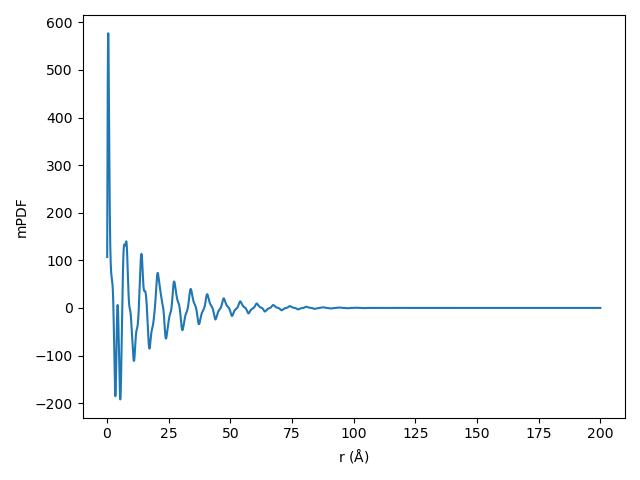

In [16]:
### Calculate the mPDF
r, f, d = mc.calc(both=True, correlationMethod='full') # note the added correlationMethod argument

# plot to make sure we have a sufficiently long range in which the mPDF damps to zero.
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'r ($\mathdefault{\AA}$)')
ax.set_ylabel(r'mPDF')

ax.plot(r,d)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


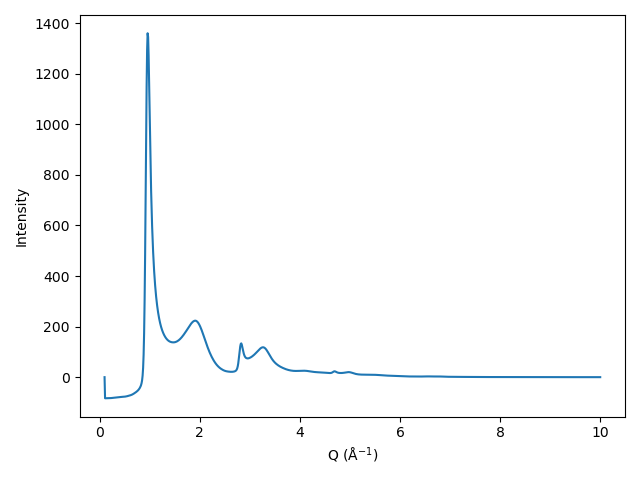

In [17]:
### Calculate the magnetic scattering intensity I(Q)
q, iq = calculateMagScatt(r, d, qmin=0.1, qmax=10, qstep=0.01, quantity='iq')

# plot the result
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Q ($\mathdefault{\AA^{-1}}$)')
ax.set_ylabel('Intensity')

ax.plot(q, iq)

plt.tight_layout()
plt.show()

Note that a couple of the peaks are strongly asymmetrical, with a sharp rise on the low-Q side and a broader tail on the high-Q side. This is characteristic of low-dimensional correlations.

In [18]:
plt.close('all')

### Exercises
 - Go back to the case of long-range magnetic correlations and calculate the magnetic scattering again, but this time use the mPDF over a much shorter r-range (maybe 30 A) as input. What does the calculated magnetic scattering look like now? Why does it look this way?
 - Create your own magnetic structure from scratch that consists of a square lattice of antiferromagnetically aligned spins (e.g. all four nearest neighbors are opposite any given spin). Calculate the mPDF and the magnetic scattering pattern for a long-range ordered state and a short-range ordered state. Comment on the peak shape in reciprocal space.